# 1. Types of Errors: Overfitting and Underfitting

## Underfitting:
- Oversimplifying the problem
- Model does not do well in the training set
- Your model is __underfitting the training data__ when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y).
- Also known as __Error due to Bias__

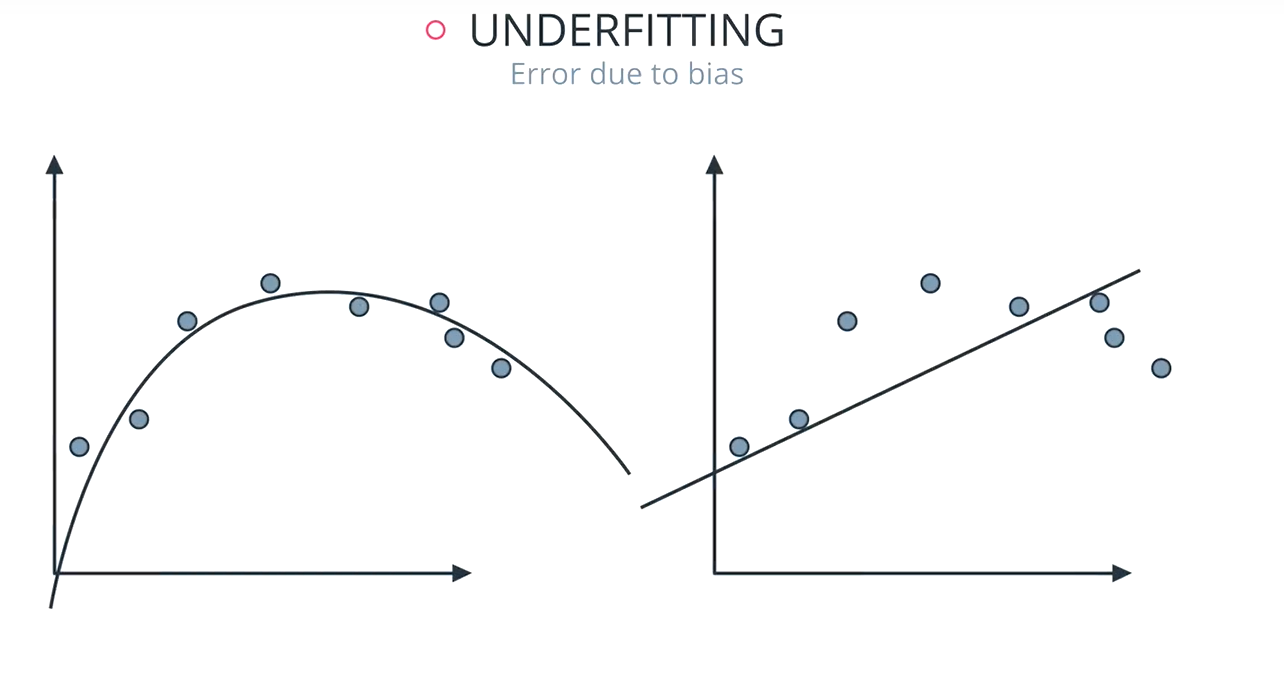

- Poor performance on the training data could be because the model is too simple (the input features are not expressive enough) to describe the target well. Performance can be improved by increasing model flexibility. To increase model flexibility, try the following:

1. Add new domain-specific features and more feature Cartesian products, and change the types of feature processing used (e.g., increasing n-grams size)
2. Decrease the amount of regularization used

## Overfitting:
- Overcomplicating the problem
- It does well in the training set, but it tends to memorize it instead of learning the characteristics of it.
- Your model is __overfitting your training data__ when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples
- Also known as __Error due to Variance__ 

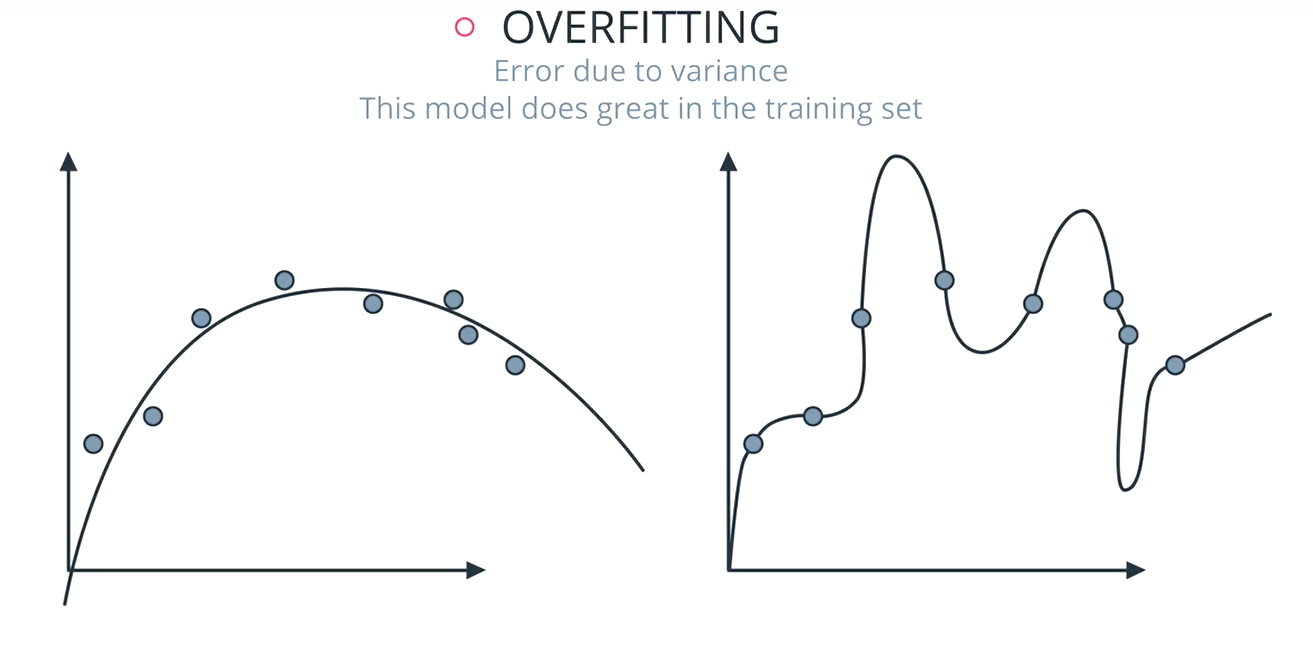

- If your model is overfitting the training data, it makes sense to take actions that reduce model flexibility. To reduce model flexibility, try the following:
1. Feature selection: consider using fewer feature combinations, decrease n-grams size, and decrease the number of numeric attribute bins.
2. Increase the amount of regularization used.

## Summary:
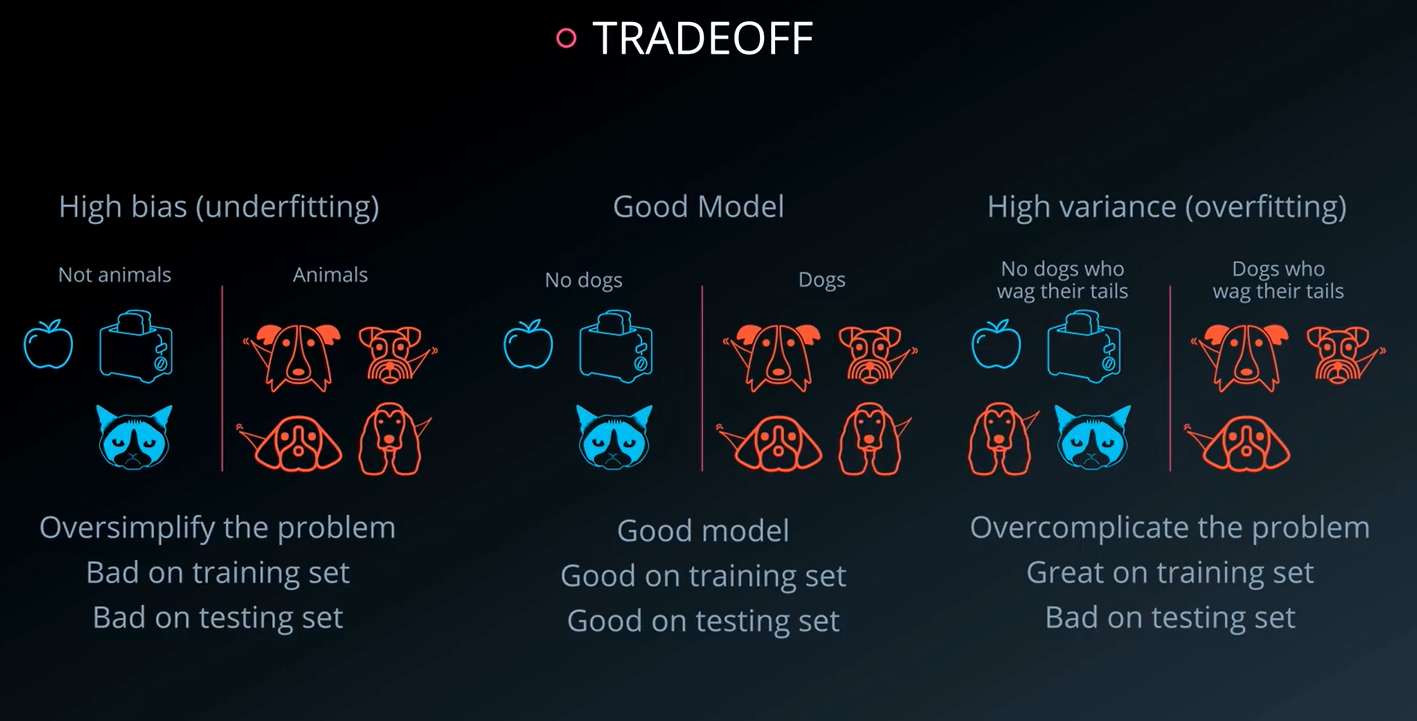

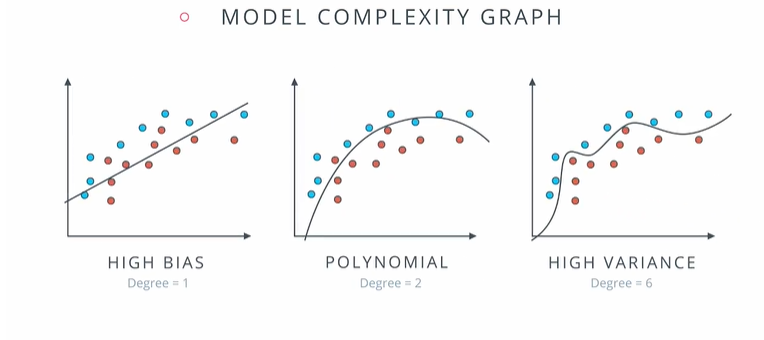

# 2. Cross - Validation

## We can not use 'Testing Dataset' for training the model!!!
- We are not allowed to touch the 'testing data' till we the model has been created
- So, we need to divide the dataset into 3 parts
1. __Training__: Use to train the parameters of the model
2. __Cross-validation__: Making decisions
3. __Testing__: Validation of the model created

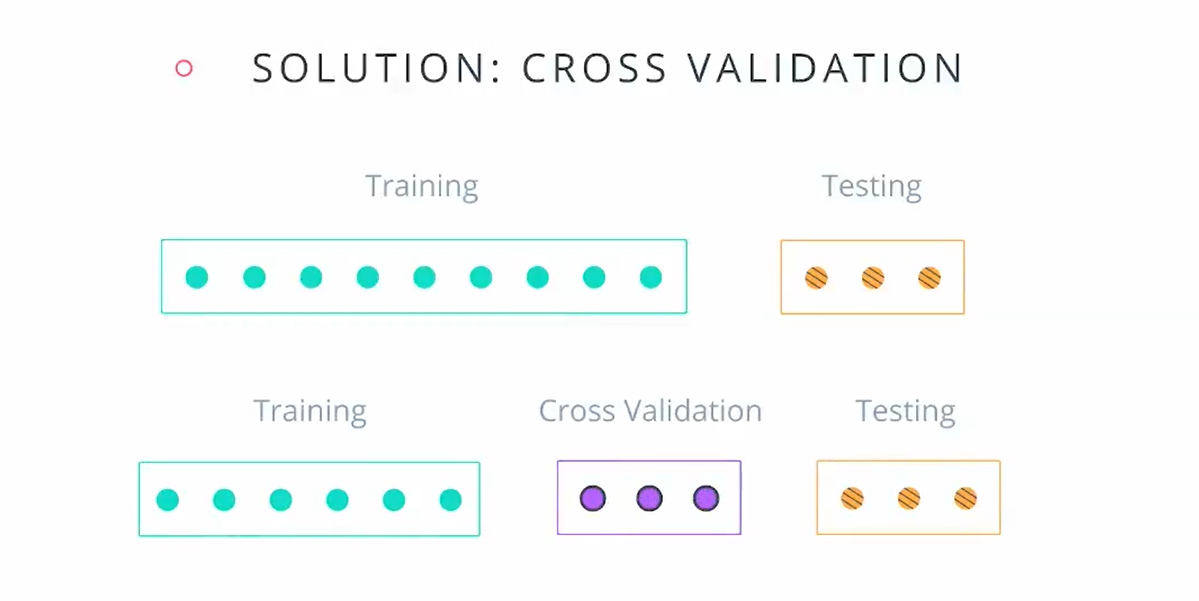

## Question: What is Model Complexity Graph?

- Goal of any supervised machine learning algorithm is to achieve __low bias__ and __low variance__. However, its not possible in real life and we have a trade-off between Bias and Variance
- As we increase the complexity of our model, it becomes overfit (high variance error)
- As we decrease the complexity of our model, it becomes underfit (high bias error)
- In the middle, we are neither overfitting nor underfitting

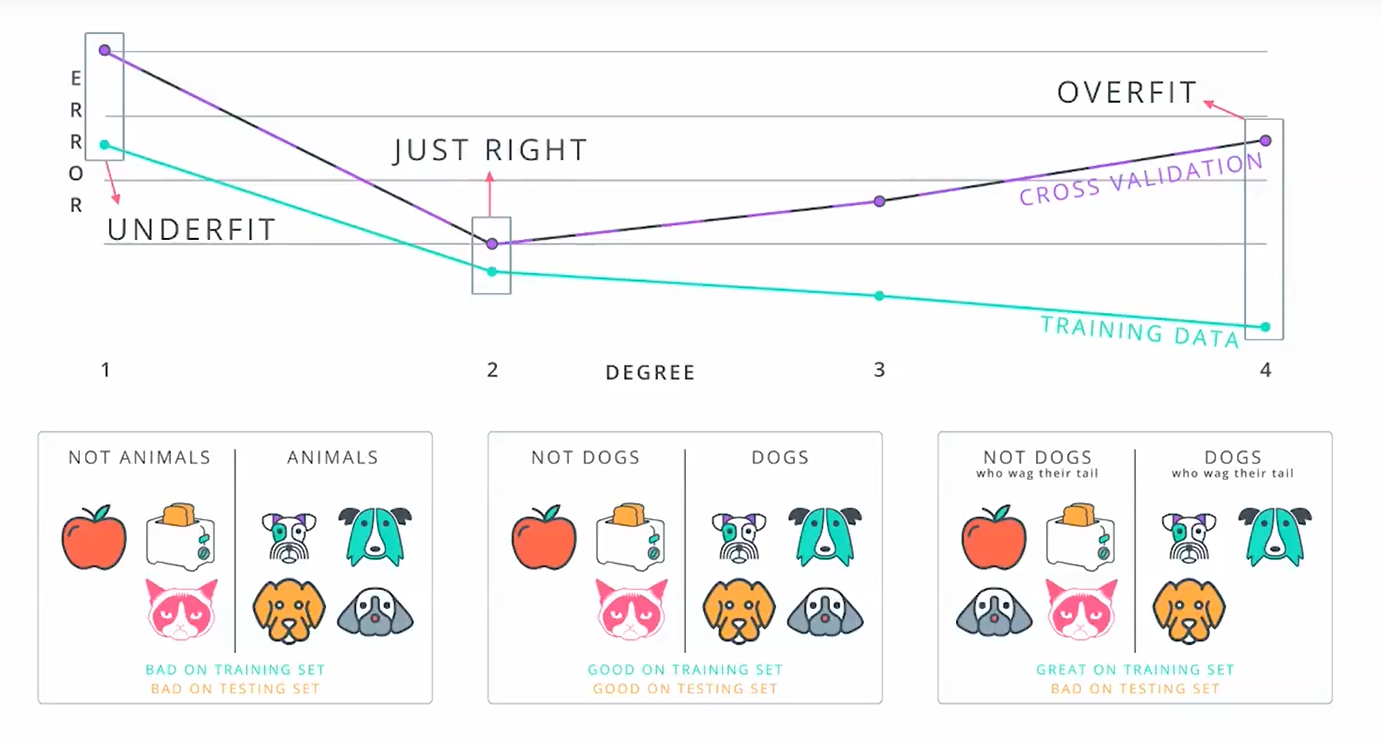

## Question: How Error behaves as we increase the complexity of our model?

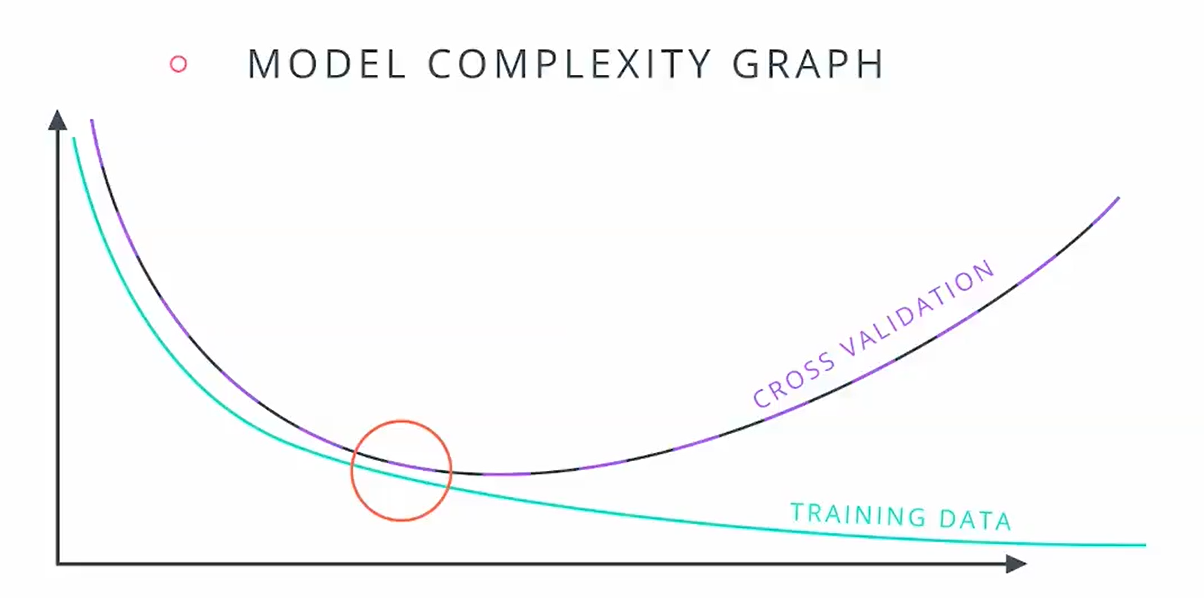

- On the x-axis, we have model complexity
- On the y-axis, we have errors
- As you move to the left, you underfit i.e. high bias error (high training and cross-validation errors)
- As you move to the right, you overfit i.e. high variance error (low training but high cross-validation errors)
- Optimal point is where the difference between the two curves is minimum ( it gives the relatively lower training and cross-validtion errors)
- Total errors first falls that reaches minimum (at the optimal point) then increases again

# 3. K-Fold Cross Validation

- For k = 4 means we break our dataset into 4 buckets
- Then, we model k times, each time using different buckets as training set
- Then, we average the results to get the final model
- For randomizing the training set, set the parameter __shuffle= True__
- The dataset is divided into k subsets and each time, one of thek subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all the k trials is computed . This helps prevent overfitting.

### The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

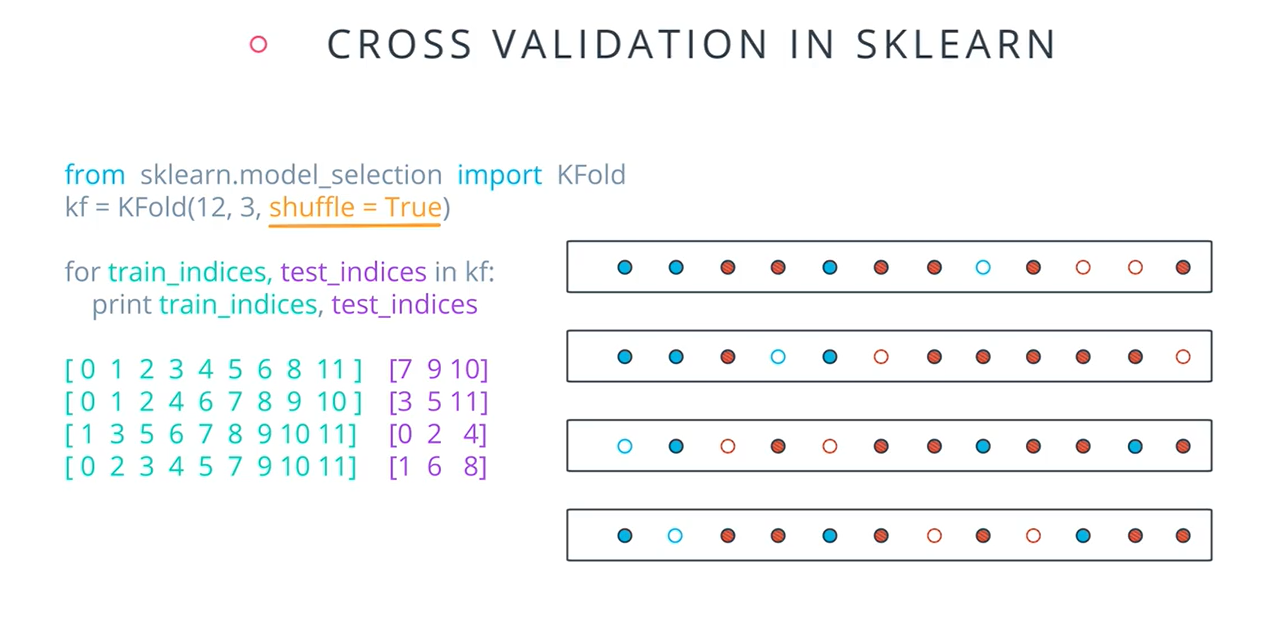

# 4. Learning Curves

## Case 1: Under fit Model

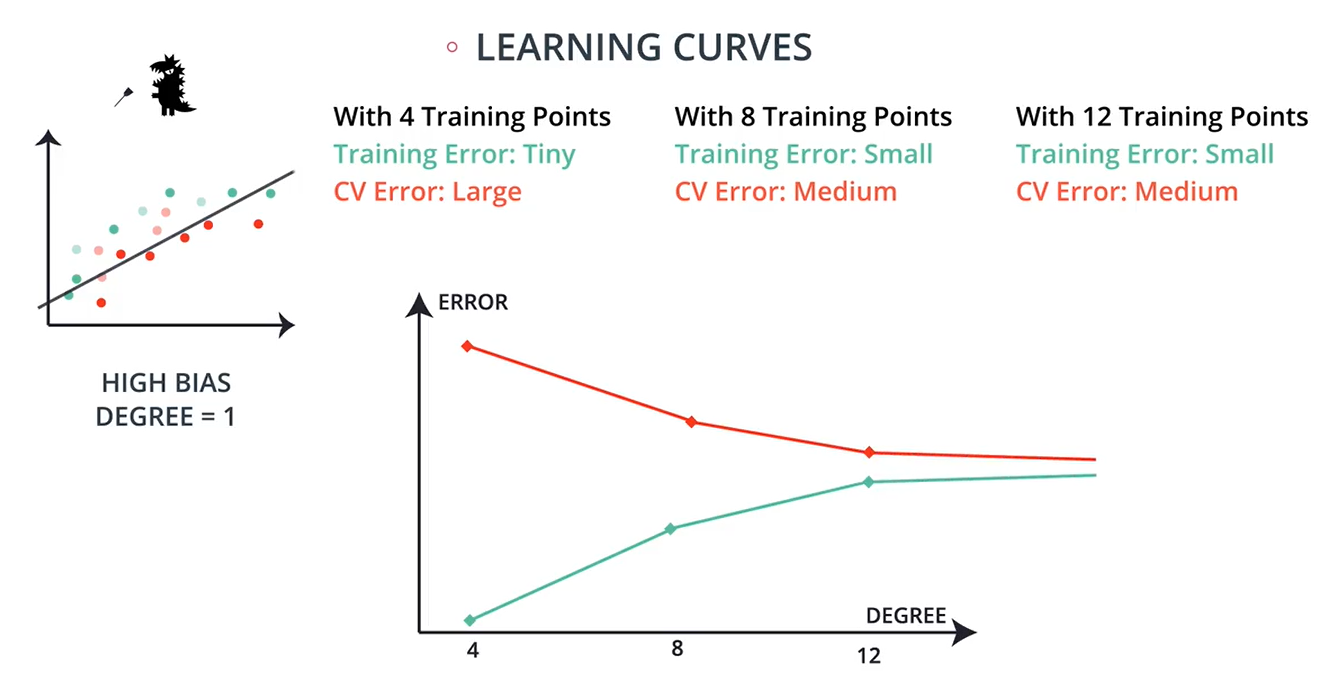

## Case 2: Good fit Model

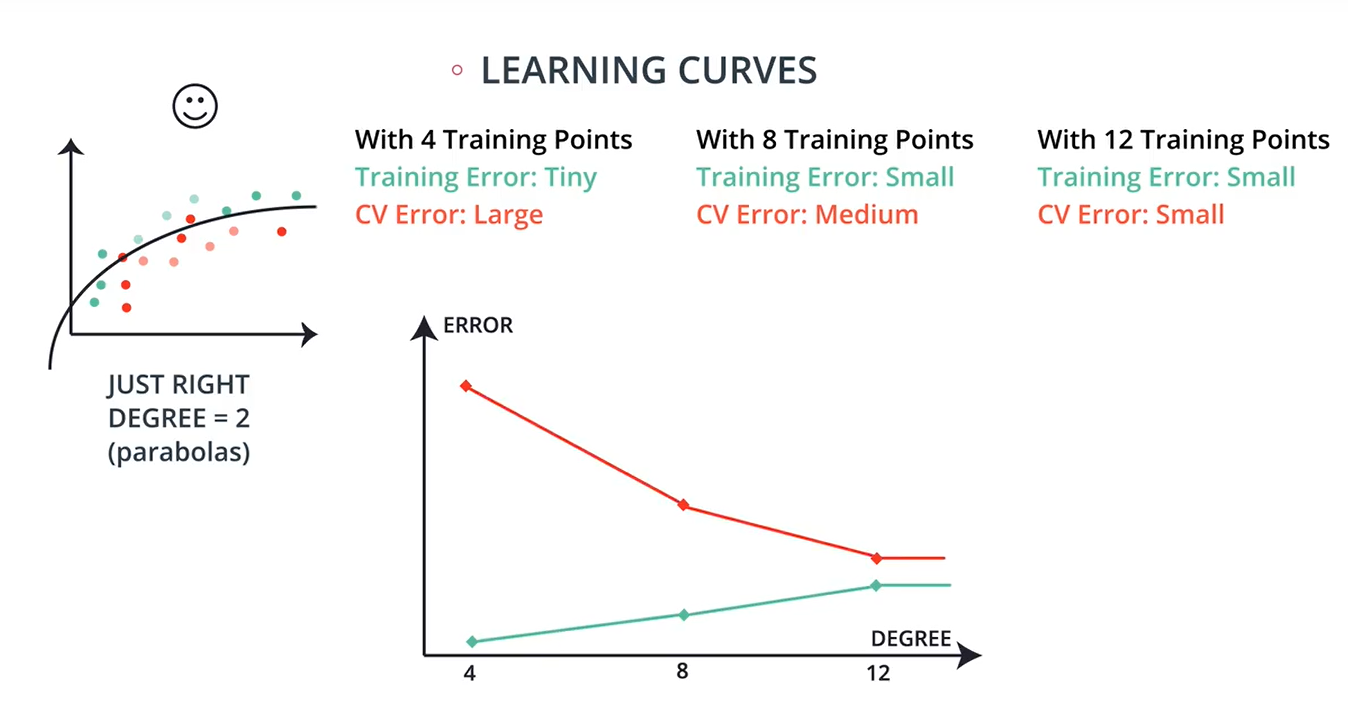

## Case 3: Over fit Model

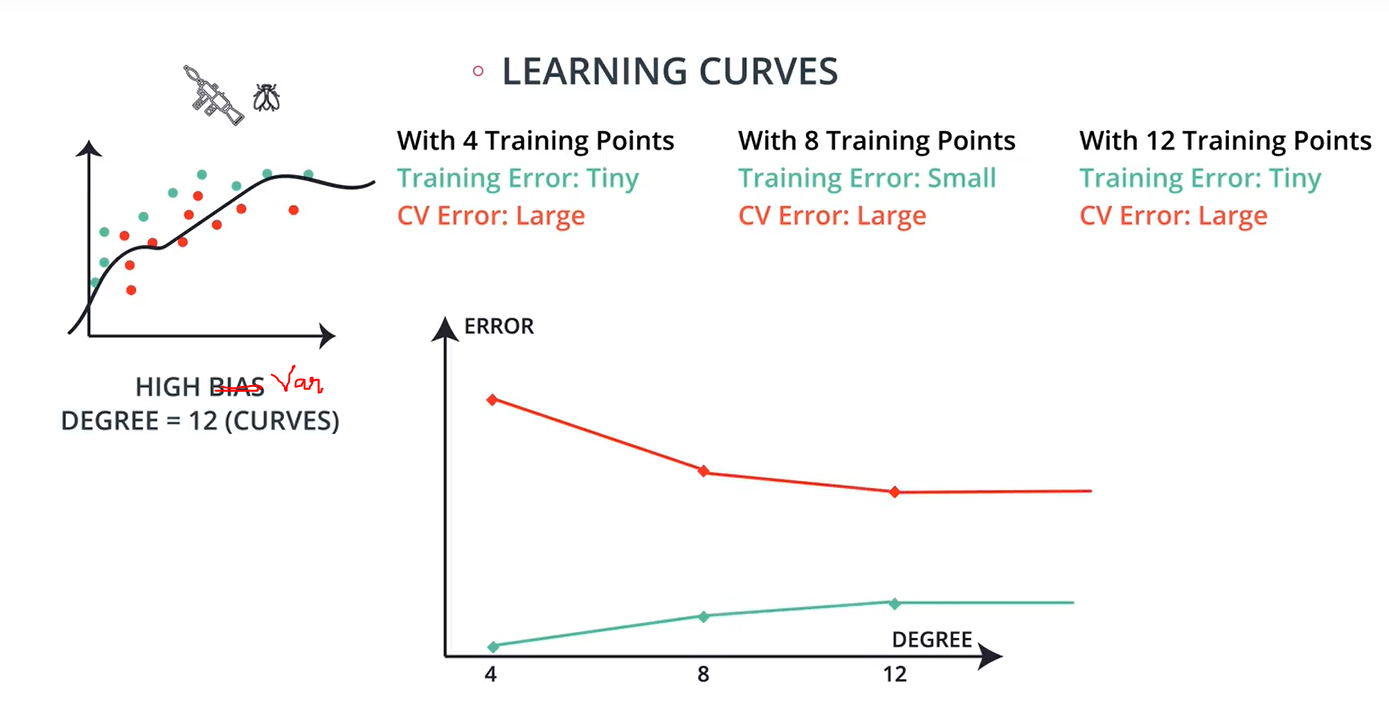

## Summary:

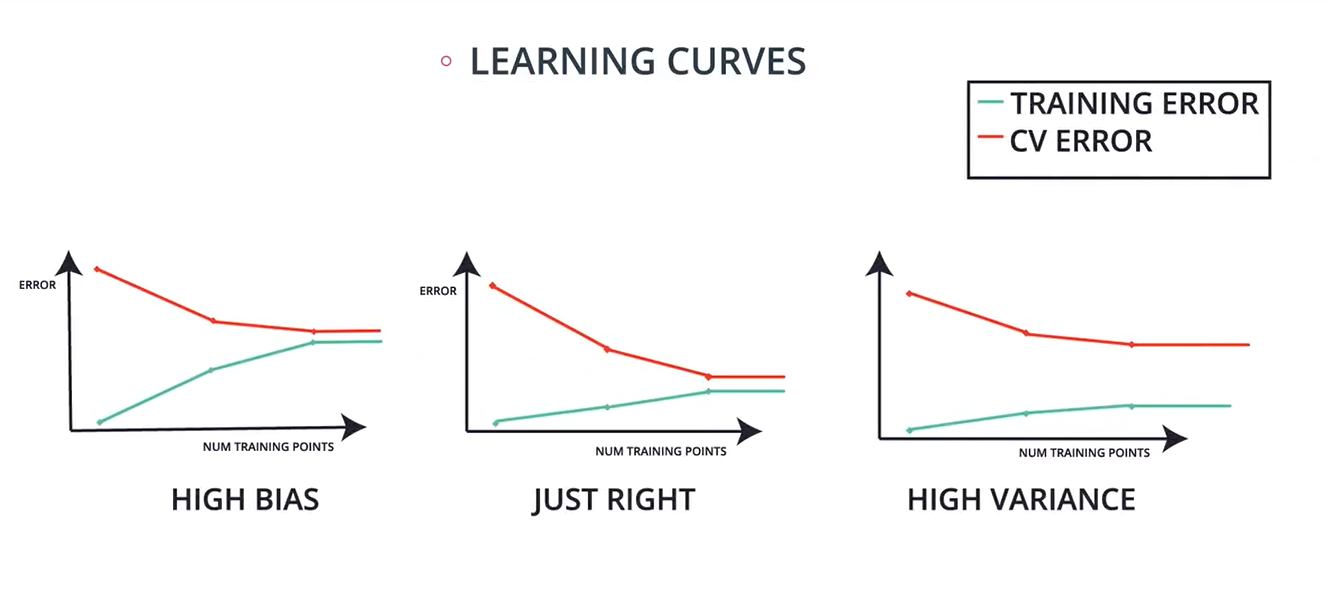

- In the high bias model, the curves will get close to each other and converge to a high point
- In the good model, the curves will will get close to each other and converge to low point
- In the high variance model, the curves will not get close to each other

## Example: Detect Overfitting and Underfitting with Learning Curves

In [1]:
# Import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('learning_curve.csv')
data.head()

x1        x2    y
0  0.336494 -0.985951 -1.0
1 -0.011043 -0.105529  1.0
2  0.238160 -0.617417  1.0
3 -0.366783 -0.713819  1.0
4  1.221923 -1.039399 -1.0

In [3]:
# Fix random seed
np.random.seed(55)

In [4]:
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

In [5]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [6]:
### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [7]:
### Logistic Regression
estimator1 = LogisticRegression()

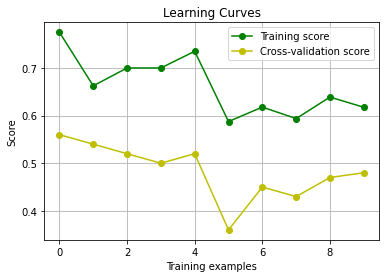

In [8]:
draw_learning_curves(X, y, estimator1, 10)
# Undefits

In [9]:
### Decision Tree
estimator2 = GradientBoostingClassifier()

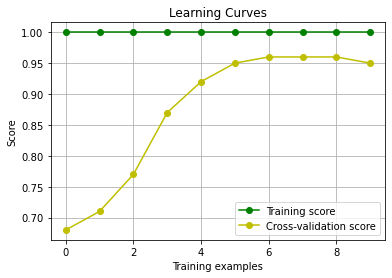

In [10]:
draw_learning_curves(X, y, estimator2, 10)
# Right fit

In [11]:
### Support Vector Machine
estimator3 = SVC(kernel='rbf', gamma=1000)

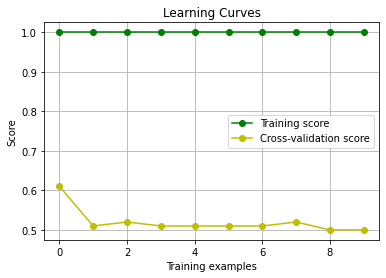

In [12]:
draw_learning_curves(X, y, estimator3, 10)
# Overfits

### Summary
- We can observe from the curves that:

1. The Logistic Regression model has a low training and testing score.
2. The Decision Tree model has a high training and testing score.
3. The Support Vector Machine model has a high training score, and a low testing score.

- From here, we can determine that the Logistic Regression model underfits, the SVM model overfits, and the Decision Tree model is just right.

### What our models do, is the following:

1. The Logistic Regression model uses a line, which is too simplistic. It doesn't do very well on the training set. Thus, it underfits.
2. The Decision Tree model uses a square, which is a pretty good fit, and generalizes well. Thus, this model is good.
3. The Support Vector Machine model actually draws a tiny circle around each point. This is clearly just memorizing the training set, and won't generalize well. Thus, it overfits.
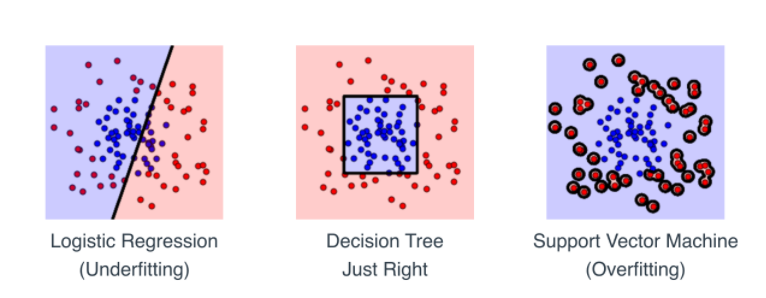

# 5. Grid Search

- A model __hyperparameter__ is a characteristic of a model that is external to the model and whose value cannot be estimated from data.
- The value of the hyperparameter has to be set before the learning process begins. For example, __c in Support Vector Machines__, __k in k-Nearest Neighbors__, __the number of hidden layers in Neural Network.__

- In contrast, a __parameter__ is an internal characteristic of the model and its value can be estimated from data. Example, beta coefficients of linear/logistic regression or support vectors in Support Vector Machines

## Case 1: Logistic Regression
1. We train the model on the training dataset and find the slope and coefficient of parameters.
    - one with degree 1 i.e. a line
    - one with degree 2
    - one with degree 3
    - one with degree 4
2. We then use cross validation data to calculate F1 score
3. We then pick the model with the highest F1 score

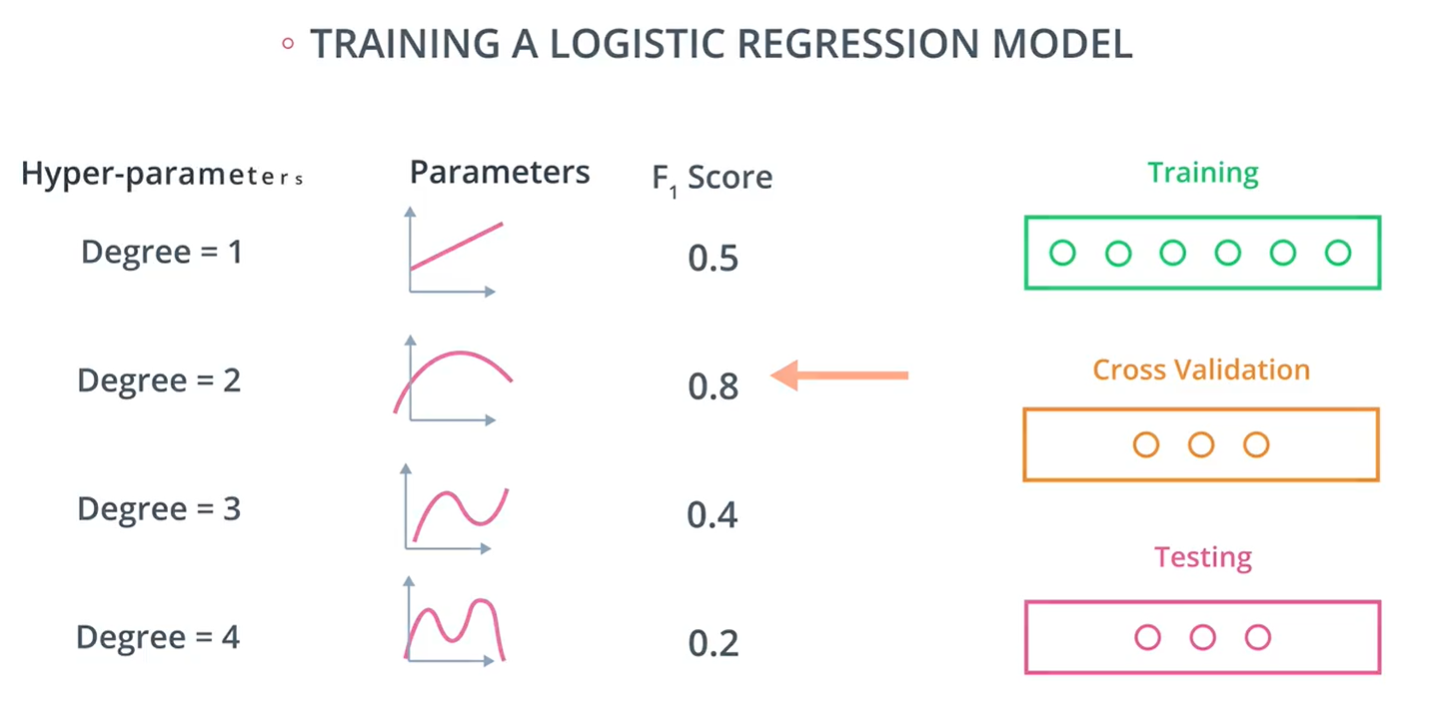

## Case 2: Decision Tree
1. We train the model on the training dataset and find the parameters namely leaf, nodes etc.
    - one with depth 1
    - one with depth 2
    - one with depth 3
    - one with depth 4
2. We then use cross validation data to calculate F1 score
3. We then pick the model with the highest F1 score

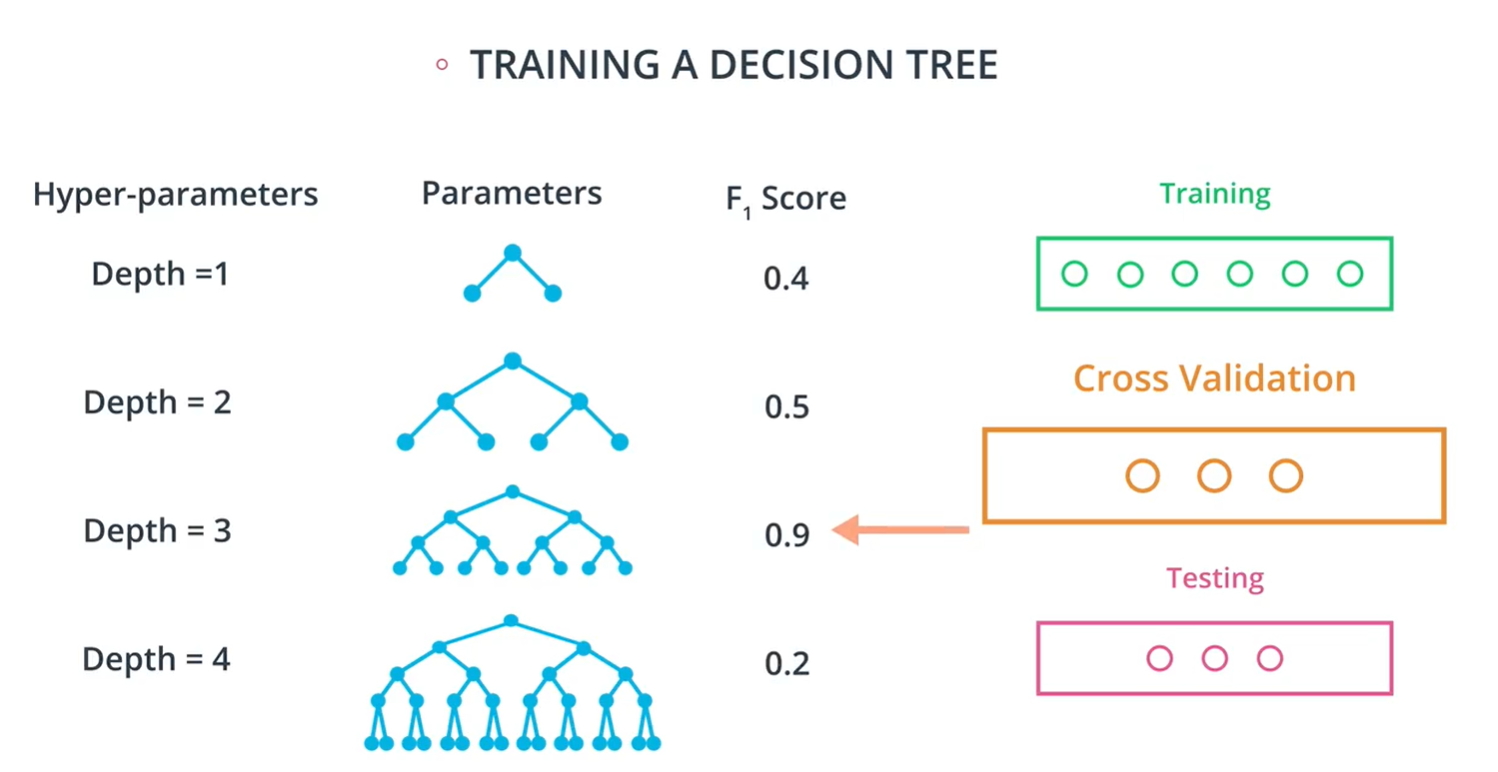

## Case 3: SVM
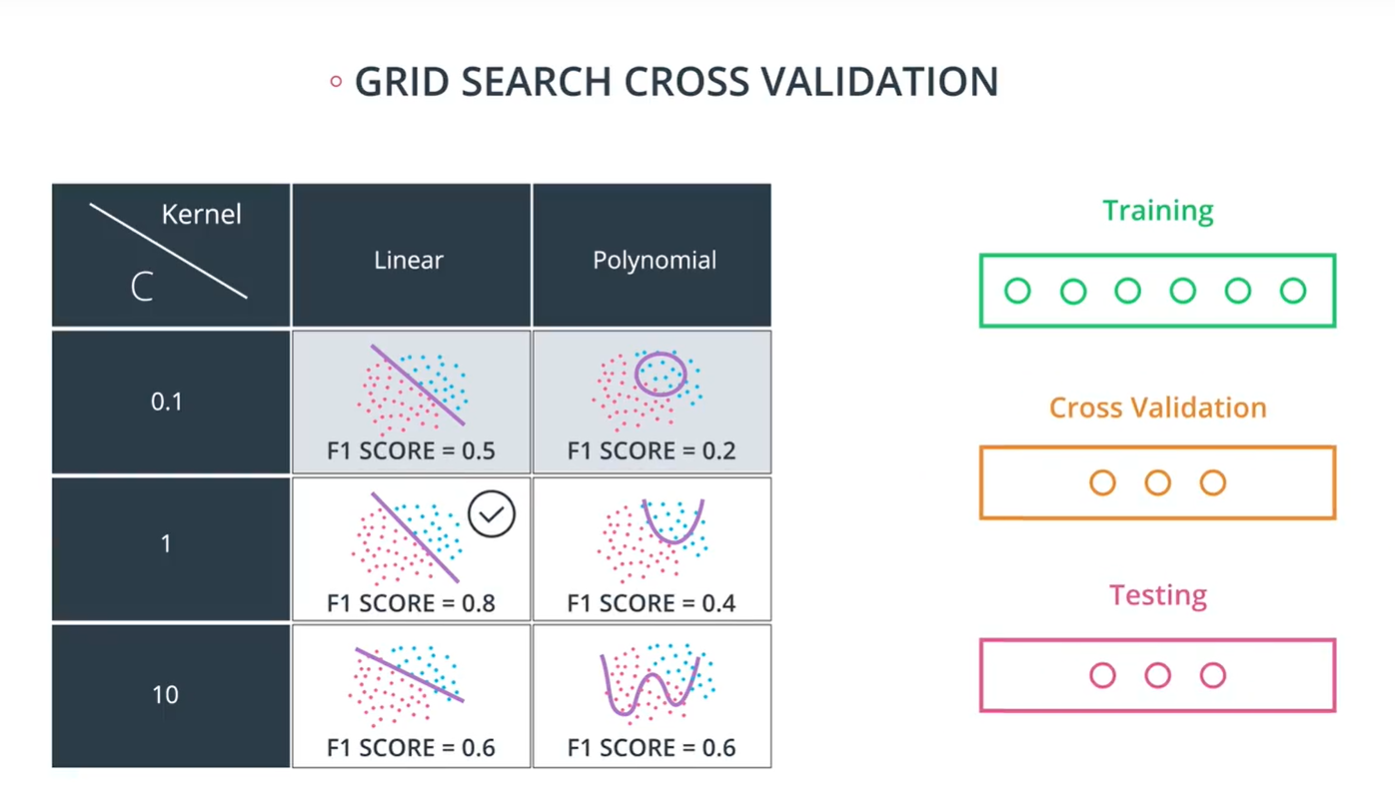

1. We train the model on the training dataset with different values of __C__ and __Kernal__
2. We then use cross validation data to calculate F1 score
3. We then pick the model with the highest F1 score

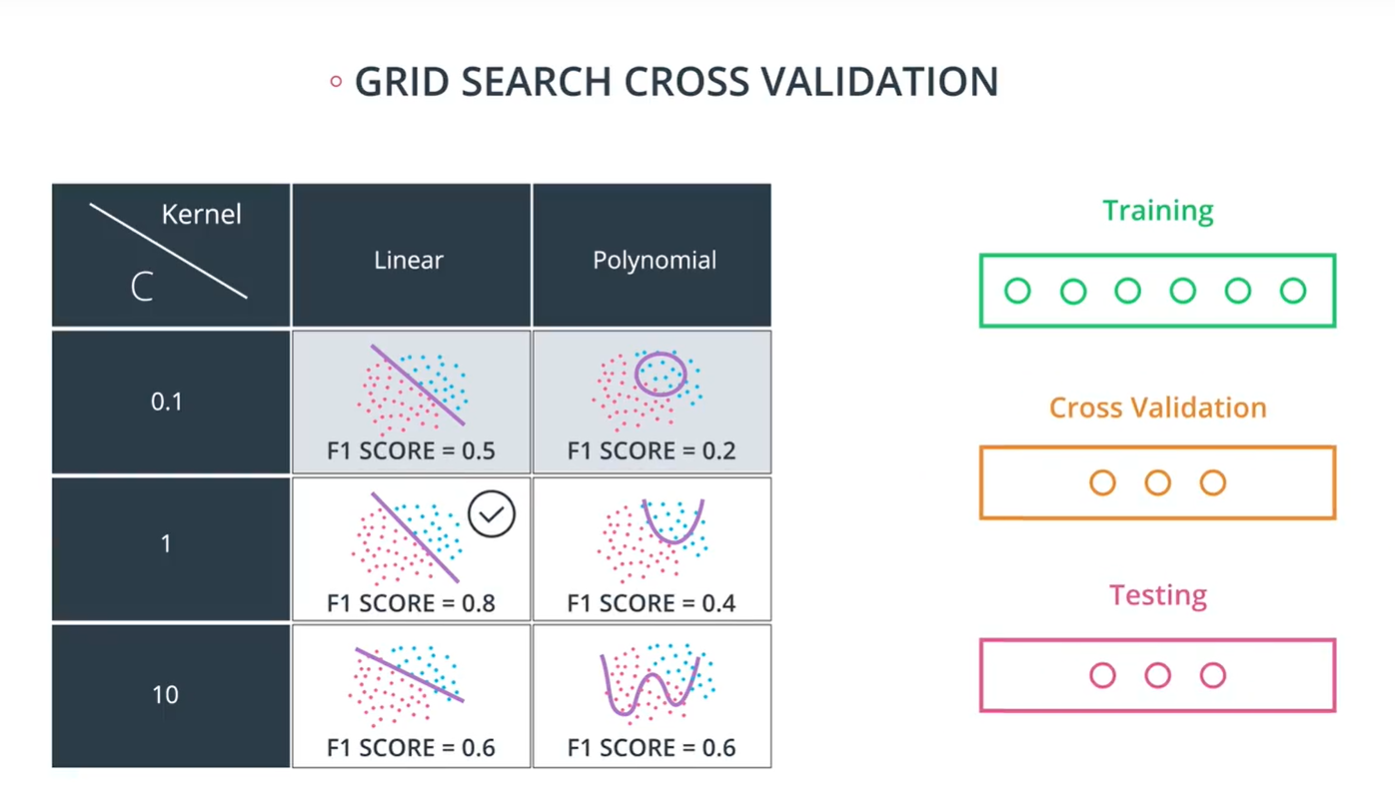

## Example:

### 1. Reading and plotting the data

In [13]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv('data.csv', header = None)
data.head()
X = data[[0, 1]]
y = data[2]

### 2. Splitting our data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Fitting a Decision Tree model

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions using the unoptimized and model
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [16]:
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


### 4. Use grid search to improve this model.

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

In [17]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

def calculate_F1_Score(parameters):
    # TODO: Make an fbeta_score scoring object.
    scorer = make_scorer(f1_score)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

    # TODO: Fit the grid search object to the training data and find the optimal parameters.
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator.
    best_clf = grid_fit.best_estimator_

    # Fit the new model.
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    # Calculate the f1_score of the new model.
    print('The training F1 Score is', f1_score(best_train_predictions, y_train))
    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

    # Let's also explore what parameters ended up being used in the new model.
    print(best_clf)

In [18]:
# Call the function
calculate_F1_Score(parameters)

The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)


In [19]:
# A finer parameters grid (super-set)
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7,8,9,10]}

# Call the function
calculate_F1_Score(parameters)

The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)
